## Notebook for Training Dog Breed Classifier Locally

In [1]:
%load_ext lab_black

In [2]:
import IPython
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import random

from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [3]:
BASE_PATH = "dog_breed_images"
TRAINING_LABELS_PATH = BASE_PATH + "/dog_breeds/training"
VALIDATION_LABELS_PATH = BASE_PATH + "/dog_breeds/validation"
ST_BERNARD_SAMPLE_IMAGE_PATH = (
    TRAINING_LABELS_PATH + "/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg"
)
TEST_DATA_PATH = BASE_PATH + "/test/"

In [4]:
dog_breeds = os.listdir(TRAINING_LABELS_PATH)

In [5]:
st_bernard_image = Image.open(ST_BERNARD_SAMPLE_IMAGE_PATH)

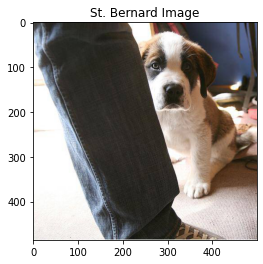

In [6]:
plt.imshow(st_bernard_image)
plt.title("St. Bernard Image")
plt.show()

## Creating a validation set

In [7]:
training_base_directory = "dog_breed_images/dog_breeds/training/"
validation_base_directory = "dog_breed_images/dog_breeds/validation/"

In [8]:
dog_breed_list = os.listdir(training_base_directory)

Creating the validation directories for each breed

In [9]:
os.listdir(validation_base_directory)[:10]

['australian_terrier',
 'toy_poodle',
 'great_pyrenees',
 'maltese_dog',
 'norwich_terrier',
 'whippet',
 'boston_bull',
 'irish_setter',
 'rottweiler',
 'kelpie']

In [10]:
# Set seed
random.seed(42)

In [11]:
for breed in dog_breed_list:
    num_files_validation = len(os.listdir(f"{validation_base_directory}{breed}"))
    if num_files_validation == 0:
        breed_images = os.listdir(f"{training_base_directory}{breed}")

        # Shuffle images in directory
        random.shuffle(breed_images)
        num_files_training = len(breed_images)

        # Taking an 80% split size for each directory
        split_index = round(num_files * 0.8)

        images_to_be_moved_to_valid = breed_images[split_index:]
        for valid_images in images_to_be_moved_to_valid:
            # Move files from training directory to test directory
            os.rename(
                f"{training_base_directory}{breed}/{valid_images}",
                f"{validation_base_directory}{breed}/{valid_images}",
            )
    else:
        print(f"Breed '{breed}' already has validation data.")

Breed 'australian_terrier' already has validation data.
Breed 'toy_poodle' already has validation data.
Breed 'great_pyrenees' already has validation data.
Breed 'maltese_dog' already has validation data.
Breed 'norwich_terrier' already has validation data.
Breed 'whippet' already has validation data.
Breed 'boston_bull' already has validation data.
Breed 'irish_setter' already has validation data.
Breed 'rottweiler' already has validation data.
Breed 'kelpie' already has validation data.
Breed 'schipperke' already has validation data.
Breed 'leonberg' already has validation data.
Breed 'welsh_springer_spaniel' already has validation data.
Breed 'pomeranian' already has validation data.
Breed 'pekinese' already has validation data.
Breed 'irish_wolfhound' already has validation data.
Breed 'blenheim_spaniel' already has validation data.
Breed 'basenji' already has validation data.
Breed 'african_hunting_dog' already has validation data.
Breed 'komondor' already has validation data.
Bre

## Baseline Model

Using a model that always predicts the most frequest class in the training data as a baseline:

In [12]:
print(
    "The accuracy of the baseline model on the training data is {0:.2f}%.".format(
        100 * len(os.listdir(TRAINING_LABELS_PATH + "/labrador_retriever")) / 10222
    )
)

The accuracy of the baseline model on the training data is 0.66%.


## Training basic CNN using Keras

Using  Keras's ImageDataGenerator to label the images of dogs for training a CNN

In [23]:
train_data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
)

In [24]:
train_generator = train_data_generator.flow_from_directory(
    TRAINING_LABELS_PATH, target_size=(300, 300), batch_size=10, class_mode="sparse"
)

Found 8185 images belonging to 120 classes.


In [25]:
validation_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)

In [26]:
validation_generator = validation_data_generator.flow_from_directory(
    VALIDATION_LABELS_PATH, target_size=(300, 300), batch_size=10, class_mode="sparse"
)

Found 2063 images belonging to 120 classes.


In [27]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(120, activation="softmax"),
    ]
)

In [92]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [93]:
history = model.fit_generator(train_generator, steps_per_epoch=810, epochs=50, verbose=1, validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 810 steps, validate for 207 steps
Epoch 1/50
810/810 [==============================] - 454s 561ms/step - loss: 4.7591 - acc: 0.0164 - val_loss: 4.6635 - val_acc: 0.0238
Epoch 2/50
810/810 [==============================] - 454s 560ms/step - loss: 4.6510 - acc: 0.0242 - val_loss: 4.5566 - val_acc: 0.0301
Epoch 3/50
810/810 [==============================] - 453s 560ms/step - loss: 4.5635 - acc: 0.0310 - val_loss: 4.4365 - val_acc: 0.0451
Epoch 4/50
810/810 [==============================] - 452s 559ms/step - loss: 4.4820 - acc: 0.0377 - val_loss: 4.4545 - val_acc: 0.0412
Epoch 5/50
810/810 [==============================] - 453s 559ms/step - loss: 4.4193 - acc: 0.0420 - val_loss: 4.3094 - val_acc: 0.0562
Epoch 6/50
810/810 [==============================] - 450s 556ms/step - loss: 4.3816 - acc: 0.0469 - val_loss: 4.2658 - val_acc: 0.0650
Epoch 7/50
810/810 [==============================] - 7541s 9s/step - loss: 4.3404 - acc: 

### Saving model

In [123]:
model.save("dog_breed_classifier_shallow_50_epochs.h5")

### Plotting the performance of the model

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [30]:
# reshaping and normalizing image to same format as training data
st_bernard_image_scaled = st_bernard_image.resize((300, 300), Image.NEAREST)
np_st_bernard = np.array(st_bernard_image_scaled)
np_st_bernard = np_st_bernard / 255.0
np_st_bernard = np_st_bernard.reshape(1, 300, 300, 3)

In [31]:
predicted_breed = model.predict(np_st_bernard).argmax(axis=-1)[0]
dog_breeds[predicted_breed]

'wire-haired_fox_terrier'

In [32]:
number_of_categories = len(dog_breeds)
print(
    "The number of different breeds in the training data are {}.".format(
        number_of_categories
    )
)

The number of different breeds in the training data are 120.


In [37]:
model = tf.keras.models.load_model("inception_20_epochs.h5")

In [89]:
# Picking dog at random from training data
rand_picked_breed = dog_breeds[random.randint(1, number_of_categories)]
# print("The breed picked at random is {}.".format(rand_picked_breed))

In [98]:
path_for_rand_breed = TRAINING_LABELS_PATH + "/" + rand_picked_breed
images_in_directory = os.listdir(path_for_rand_breed)
rand_picked_image = images_in_directory[random.randint(1, len(images_in_directory))]
rand_image_path = path_for_rand_breed + "/" + rand_picked_image
print(rand_image_path)
rand_picked_image = Image.open(rand_image_path)

dog_breed_images/dog_breeds/training/pomeranian/bf376d80e8752194a70b88cba386b4f2.jpg


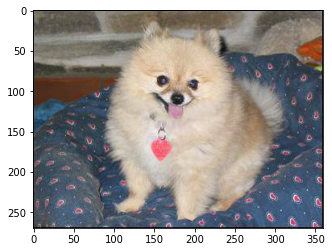

In [99]:
plt.imshow(rand_picked_image)
# plt.title()
plt.show()

In [100]:
rand_picked_image_scaled = rand_picked_image.resize((150, 150), Image.NEAREST)
np_rand_picked_image_scaled = np.array(rand_picked_image_scaled)
np_rand_picked_image_norm = np_rand_picked_image_scaled / 255.0
np_rand_picked_image_norm = np_rand_picked_image_norm.reshape(1, 150, 150, 3)

In [101]:
dog_breeds.sort()

In [102]:
predicted_breed = dog_breeds[
    model.predict(np_rand_picked_image_norm).argmax(axis=-1)[0]
]
print(
    "Predicted breed of dog is {}, and the actual breed is {}.".format(
        predicted_breed, rand_picked_breed
    )
)

Predicted breed of dog is pomeranian, and the actual breed is pomeranian.


In [95]:
from tensorflow.keras.preprocessing import image

img = image.img_to_array(image.load_img(rand_image_path, target_size=(150, 150)))
img_vec = np.expand_dims(img, axis=0)
predicted_breed = dog_breeds[model.predict(img_vec).argmax(axis=-1)[0]]
print(
    "Predicted breed of dog is {}, and the actual breed is {}.".format(
        predicted_breed, rand_picked_breed
    )
)

Predicted breed of dog is papillon, and the actual breed is pomeranian.


### Train model using Inception

Load in Inception from TF

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

Take weights for inception.

In [15]:
inception_path = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

Create model and load in weights

In [16]:
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None
)

pre_trained_model.load_weights(inception_path)

Freeze layers for inception.

In [17]:
for layer in pre_trained_model.layers:
    layer.trainable = False

Cut off layers after the layer called "mixed7"

In [18]:
last_layer = pre_trained_model.get_layer("mixed7")
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


Flatten output of mixed7 layer add a dense layer with 1024 nodes, 
add a dense layer with 120 nodes (120 breeds) and add a softmax activation function

In [18]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)           
x = layers.Dense  (120, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [21]:
train_generator = train_datagen.flow_from_directory(TRAINING_LABELS_PATH,
                                                   batch_size=10,
                                                   class_mode='sparse',
                                                   target_size=(150,150))     

validation_generator =  test_datagen.flow_from_directory(VALIDATION_LABELS_PATH,
                                                   batch_size=10,
                                                   class_mode='sparse',
                                                   target_size=(150,150)) 

Found 8185 images belonging to 120 classes.
Found 2063 images belonging to 120 classes.


In [22]:
history = model.fit_generator(train_generator, steps_per_epoch=810, epochs=5, verbose=1, validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 810 steps, validate for 207 steps
Epoch 1/5
810/810 [==============================] - 225s 277ms/step - loss: 4.7110 - acc: 0.0217 - val_loss: 4.8380 - val_acc: 0.0577
Epoch 2/5
810/810 [==============================] - 222s 275ms/step - loss: 4.0889 - acc: 0.0665 - val_loss: 4.1543 - val_acc: 0.1265
Epoch 3/5
810/810 [==============================] - 230s 283ms/step - loss: 3.8044 - acc: 0.0991 - val_loss: 4.6946 - val_acc: 0.1483
Epoch 4/5
810/810 [==============================] - 230s 284ms/step - loss: 3.6554 - acc: 0.1191 - val_loss: 4.6150 - val_acc: 0.1755
Epoch 5/5
810/810 [==============================] - 230s 284ms/step - loss: 3.5712 - acc: 0.1319 - val_loss: 4.6022 - val_acc: 0.2133


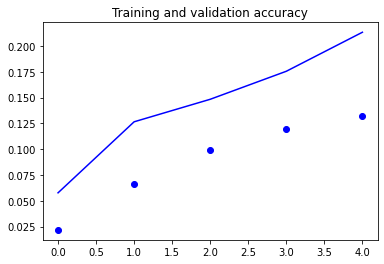

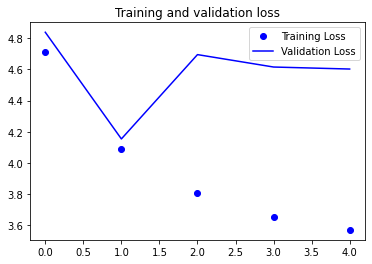

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
history = model.fit_generator(train_generator, steps_per_epoch=810, epochs=20, verbose=1, validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 810 steps, validate for 207 steps
Epoch 1/20
810/810 [==============================] - 222s 274ms/step - loss: 3.4889 - acc: 0.1475 - val_loss: 4.5653 - val_acc: 0.2346
Epoch 2/20
810/810 [==============================] - 221s 273ms/step - loss: 3.4286 - acc: 0.1603 - val_loss: 4.7013 - val_acc: 0.2254
Epoch 3/20
810/810 [==============================] - 223s 276ms/step - loss: 3.3801 - acc: 0.1722 - val_loss: 4.3228 - val_acc: 0.2395
Epoch 4/20
810/810 [==============================] - 228s 282ms/step - loss: 3.3374 - acc: 0.1784 - val_loss: 4.2488 - val_acc: 0.2530
Epoch 5/20
810/810 [==============================] - 225s 278ms/step - loss: 3.2962 - acc: 0.1783 - val_loss: 4.2691 - val_acc: 0.2506
Epoch 6/20
810/810 [==============================] - 236s 291ms/step - loss: 3.2626 - acc: 0.1862 - val_loss: 4.5552 - val_acc: 0.2429
Epoch 7/20
810/810 [==============================] - 229s 283ms/step - loss: 3.2614 - acc

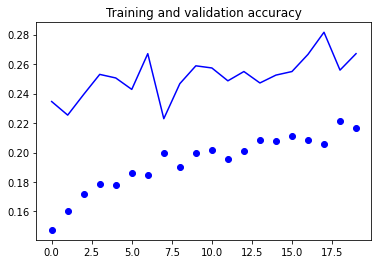

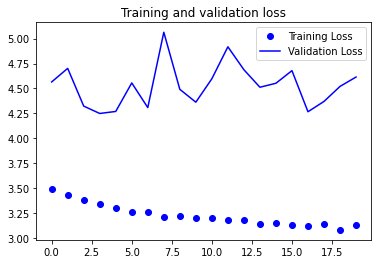

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
model.save("inception_20_epochs.h5")